# The number of cats
You are working on a natural language processing project to determine what makes great writers so great. Your current hypothesis is that great writers talk about cats a lot. To prove it, you want to count the number of times the word "cat" appears in "Alice's Adventures in Wonderland" by Lewis Carroll. You have already downloaded a text file, alice.txt, with the entire contents of this great book.

Use the open() context manager to open alice.txt and assign the file to the file variable.

In [3]:
# Open "alice.txt" and assign the file to "file"
with open('/kaggle/input/alicetxt/alice.txt') as file:
  text = file.read()

n = 0
for word in text.split():
  if word.lower() in ['cat', 'cats']:
    n += 1

print('Lewis Carroll uses the word "cat" {} times'.format(n))

Lewis Carroll uses the word "cat" 24 times


# The speed of cats
You're working on a new web service that processes Instagram feeds to identify which pictures contain cats (don't ask why -- it's the internet). The code that processes the data is slower than you would like it to be, so you are working on tuning it up to run faster. Given an image, image, you have two functions that can process it:

* process_with_numpy(image)
* process_with_pytorch(image)

Your colleague wrote a context manager, timer(), that will print out how long the code inside the context block takes to run. She is suggesting you use it to see which of the two options is faster. Time each function to determine which one to use in your web service.


* Use the timer() context manager to time how long process_with_numpy(image) takes to run.
* Use the timer() context manager to time how long process_with_pytorch(image) takes to run.

In [5]:
image = get_image_from_instagram()

# Time how long process_with_numpy(image) takes to run
with timer():
  print('Numpy version')
  process_with_numpy(image)

# Time how long process_with_pytorch(image) takes to run
with timer():
  print('Pytorch version')
  process_with_pytorch(image)


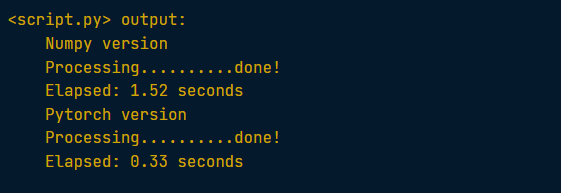

Terrific timing! Now that you know the pytorch version is faster, you can use it in your web service to ensure your users get the rapid response time they expect.

You may have noticed there was no as <variable name> at the end of the with statement in timer() context manager. That is because timer() is a context manager that does not return a value, so the as <variable name> at the end of the with statement isn't necessary. In the next lesson, you'll learn how to write your own context managers like timer().

# Creating context manager 2 ways

* Classes with __enter__ and __exit__ methods: This is the traditional way to create a context manager. You define a class and implement these two special methods.
__enter__(self): This method is called when entering the with statement's block. It sets up the context and can return a value that will be bound to the variable specified in the as clause (e.g., with MyContext() as var:).

* __exit__(self, exc_type, exc_value, traceback): This method is called when exiting the with statement's block, regardless of whether an exception occurred. It handles cleanup and resource release. The parameters provide information about any exception that might have occurred.

In [7]:
class MyContextManager:
    def __enter__(self):
        print("Entering the context")
        # Setup resources here
        return "Resource"  # Value bound to 'as' variable

    def __exit__(self, exc_type, exc_value, traceback):
        print("Exiting the context")
        # Cleanup resources here
        if exc_type:
            print(f"An exception occurred: {exc_value}")
        # Returning True suppresses the exception, False (or None) re-raises it

# Usage
with MyContextManager() as resource_var:
    print(f"Inside the context, using {resource_var}")

Entering the context
Inside the context, using Resource
Exiting the context


# Generator functions with the @contextlib.contextmanager decorator: This provides a more concise way to create context managers, especially for simpler cases.

* You define a generator function that yields exactly once.
* The code before yield acts as the setup (equivalent to __enter__).
* The value yielded becomes the value bound to the as variable.
* The code after yield acts as the cleanup (equivalent to __exit__).



In [8]:
from contextlib import contextmanager

@contextmanager
def my_context_manager_function():
    print("Entering the context (function)")
    # Setup resources here
    yield "Resource from function"  # Value bound to 'as' variable
    print("Exiting the context (function)")
    # Cleanup resources here

# Usage
with my_context_manager_function() as resource_func:
    print(f"Inside the context, using {resource_func}")

Entering the context (function)
Inside the context, using Resource from function
Exiting the context (function)


# The timer() context manager
A colleague of yours is working on a web service that processes Instagram photos. Customers are complaining that the service takes too long to identify whether or not an image has a cat in it, so your colleague has come to you for help. You decide to write a context manager that they can use to time how long their functions take to run.


* Add a decorator from the contextlib module to the timer() function that will make it act like a context manager.
* Send control from the timer() function to the context block.

In [11]:
import time

# Add a decorator that will make timer() a context manager
@contextmanager
def timer():
  """Time the execution of a context block.

  Yields:
    None
  """
  start = time.time()
  # Send control back to the context block
  yield
  end = time.time()
  print('Elapsed: {:.2f}s'.format(end - start))

with timer():
  print('This should take approximately 0.25 seconds')
  time.sleep(0.25)

This should take approximately 0.25 seconds
Elapsed: 0.25s


You're managing context like a boss! And your colleague can now use your timer() context manager to figure out which of their functions is running too slow. Notice that the three elements of a context manager are all here: a function definition, a yield statement, and the @contextlib.contextmanager decorator. It's also worth noticing that timer() is a context manager that does not return an explicit value, so yield is written by itself without specifying anything to return

# A read-only open() context manager
You have a bunch of data files for your next deep learning project that took you months to collect and clean. It would be terrible if you accidentally overwrote one of those files when trying to read it in for training, so you decide to create a read-only version of the open() context manager to use in your project.

The regular open() context manager:

* takes a filename and a mode ('r' for read, 'w' for write, or 'a' for append)
* opens the file for reading, writing, or appending
* yields control back to the context, along with a reference to the file
* waits for the context to finish and then closes the file before exiting
* Your context manager will do the same thing, except it will only take the filename as an argument and it will only open the file for reading.


#### Yield control from open_read_only() to the context block, ensuring that the read_only_file object gets assigned to my_file.
#### Use read_only_file's .close() method to ensure that you don't leave open files lying around.

In [25]:
@contextmanager
def open_read_only(filename):
  """Open a file in read-only mode.

  Args:
    filename (str): The location of the file to read

  Yields:
    file object
  """
  read_only_file = open(filename, mode='r')
  # Yield read_only_file so it can be assigned to my_file
  yield read_only_file
  # Close read_only_file
  read_only_file.close()

with open_read_only('/kaggle/working/test_file.txt') as my_file:
  print(my_file.read())

Congratulations! You wrote a context manager that acts like 'open()' but operates in read-only mode.


In [24]:
# Create and write to test.txt
with open('/kaggle/working/test_file.txt', 'w') as f:
    f.write("Congratulations! You wrote a context manager that acts like 'open()' but operates in read-only mode.")




That is a radical read-only context manager! Now you can relax, knowing that every time you use with open_read_only() your files are safe from being accidentally overwritten. This function is an example of a context manager that _does_ return a value, so we write yield read_only_file instead of just yield. Then the read_only_file object gets assigned to my_file in the with statement so that whoever is using your context can call its .read() method in the context block.

# Scraping the NASDAQ
Training neural nets is expensive - invest in NVIDIA! To find the best time to invest, collect stock data.

The context manager stock('NVDA') connects to NASDAQ and returns an object that you can use to get the latest price by calling its .price() method. You want to connect to stock('NVDA') and record 10 timesteps of price data by writing it to the file NVDA.txt.

You will notice the use of an underscore when iterating over the for loop. If this is confusing to you, don't worry. It could easily be replaced with an index i. But since we will not be using this index, we are using a dummy operator, _, which doesn't use any additional memory.


* Use the stock('NVDA') context manager and assign the result to nvda.
* Open a file for writing with open('NVDA.txt', 'w') and assign the file object to f_out so you can record the price over time.

In [ ]:
# Use the "stock('NVDA')" context manager
# and assign the result to the variable "nvda"
# Open "NVDA.txt" for writing as f_out
with stock('NVDA') as nvda:
  # Open "NVDA.txt" for writing as f_out
  with open('NVDA.txt', 'w') as f_out:
      for _ in range(10):
        value = nvda.price()
        print('Logging ${:.2f} for NVDA'.format(value))
        f_out.write('{:.2f}\n'.format(value))

# Changing the working directory
You are using an open-source library that lets you train deep neural networks on your data. Unfortunately, during training, this library writes out checkpoint models (i.e., models that have been trained on a portion of the data) to the current working directory. You find that behavior frustrating because you don't want to have to launch the script from the directory where the models will be saved.

You decide that one way to fix this is to write a context manager that changes the current working directory, lets you build your models, and then resets the working directory to its original location. You'll want to be sure that any errors that occur during model training don't prevent you from resetting the working directory to its original location.


* Add a statement that lets you handle any errors that might occur inside the context.
* Add a statement that ensures os.chdir(current_dir) will be called, whether there was an error or not.



In [26]:
def in_dir(directory):
  """Change current working directory to `directory`,
  allow the user to run some code, and change back.

  Args:
    directory (str): The path to a directory to work in.
  """
  current_dir = os.getcwd()
  os.chdir(directory)

  # Add code that lets you handle errors
  try:
    yield
  # Ensure the directory is reset,
  # whether there was an error or not
  finally:
    os.chdir(current_dir)

Excellent error handling! Now, even if someone writes buggy code when using your context manager, you will be sure to change the current working directory back to what it was when they called in_dir(). This is important to do because your users might be relying on their working directory being what it was when they started the script. in_dir() is a great example of the CHANGE/RESET pattern that indicates you should use a context manager.